# 70.a G251W doubles vs sum of singles

In [1]:
#########################
#                       #
#                       #
#    LIBRARY IMPORT     #
#                       #
#                       #
#########################

import os, re, sys
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from functools import reduce
from enum import Enum
from importlib import reload
import matplotlib as mpl

In [2]:
#############################
#                           #
#                           #
#        CONSTANTS          #
#                           #
#                           #
#############################
LOCAL_DIR = '.'
DATA_DIR = LOCAL_DIR+'/data'
OUTPUT_DIR = LOCAL_DIR+'/figures/70.a_G251W_doubles_vs_sum_singles'
if not os.path.exists(OUTPUT_DIR): os.makedirs(OUTPUT_DIR)

DATA_SHEETNAME = '70a_G251W_double_vs_sumSingles'

In [3]:
#############################
#                           #
#                           #
#        LOAD DATA          #
#                           #
#                           #
#############################
from importlib import reload
sys.path.append(LOCAL_DIR) #Helper Functions Here
import FramHelperScripts
reload(FramHelperScripts)
FHS = FramHelperScripts.FramHelperFunctions(DATA_DIR)

## Load data

In [4]:
#########################
#                       #
#                       #
#       LOAD DATA       #
#                       #
#                       #
#########################
data_df = pd.read_excel(
    FHS.data_filename, sheet_name=DATA_SHEETNAME,
)

## Plot data

In [5]:
def plot_data(savefig=False, show_text=True):
    figwidth = 6
    figheight = 6
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.set_size_inches(figwidth, figheight)
    xcol='deltaEVH_double'
    ycol='deltaEVH_G51W_plus_deltaEVH_other'

    alpha=0.5
    ax.plot([0,1],[0,1], transform=ax.transAxes, color='#d3d3d3')

    #bit of a hack (alpha zero) to have labels on the plot rather than dots
    sns.scatterplot(
        data=data_df, x=xcol, y=ycol,
        alpha=alpha, linewidth=0, ax=ax, 
        label='G251W mutation + other 70.a mutation'
    )
    ax.set_ylim([-9, -1])
    ax.set_xlim([-9, -1])
    ax.set_ylabel(
        'Predicted fitness: sum of the single mutations\ndeltaEVH(G251W) + deltaEVH(indicated mutation)',
        fontsize=14
    )
    ax.set_xlabel(
        'Predicted fitness: double mutation\ndeltaEVH(G251W + indicated mutation)', 
        fontsize=14
    )
    ax.legend()

    ax.yaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_tick_params(labelsize=12)

    if savefig:
        w_text = ''
        fig.savefig(
            OUTPUT_DIR+
            '/70a_G251W_doubles_vs_sumsingles_{0}x{1}{2}.pdf'.format(
                figwidth, figheight, w_text
            )
        )

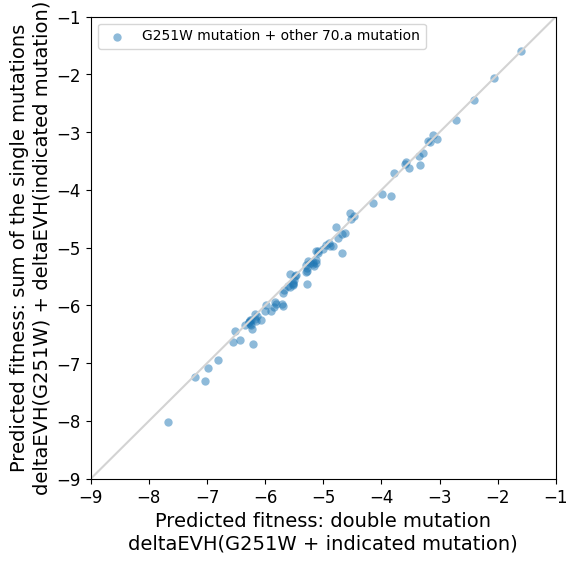

In [6]:
plot_data(show_text=False, savefig=True)

In [7]:
def get_source_data():
    xcol='deltaEVH_double'
    ycol='deltaEVH_G51W_plus_deltaEVH_other'
    tmp_df = data_df[[
        'pos1', 'pos2', xcol, ycol
    ]].rename(columns={
        'pos1': 'mutation1',
        'pos2': 'mutation2',
        xcol: 'X-axis - predicted fitness double mutation',
        ycol: 'Y-axis - predicted fitness sum single mutations'
    }).reset_index(drop=True)
    return tmp_df
get_source_data().to_csv(OUTPUT_DIR+'/70a_G251W_doubles_vs_sumsingles.tab', sep ='\t', index=False)
#sns.scatterplot(
#    get_source_data(),
#    x='X-axis - predicted fitness double mutation',
#    y='Y-axis - predicted fitness sum single mutations'
#)